In [5]:
# goal: reproduce figure 5 from dean's artiphysiology paper
import numpy as np
import torch
import xarray as xr
from torchvision import datasets, models, transforms
from scipy.stats import kurtosis
from util.net_response_functions import *
from util.visualization_functions import *

# params
net_name = "vgg16"
layer_name = "conv13"

In [10]:
# import apc fits
apc_fits = np.load(f"./data/apc_fit/{net_name}/{net_name}_{layer_name}_apc_fits.npy",
                  allow_pickle=True)

# import apc models
apc_models = xr.open_dataset("./data/apc_fit/apc_models_362_16x16.nc")

# import actual responses
outputs_tt = torch.load(f"./data/net_responses/{net_name}/{net_name}_{layer_name}_output.pt")

In [11]:
# want n units with highest correlation that pass kurtosis filter    
selective_units = get_n_most_selective_units(10, apc_fits, apc_models, outputs_tt)
print(selective_units)

[[4.46000000e+02 6.27580000e+04 6.26369929e-01]
 [1.74000000e+02 6.50760000e+04 6.09685971e-01]
 [4.66000000e+02 6.25160000e+04 5.95267894e-01]
 [2.12000000e+02 6.25150000e+04 5.70594507e-01]
 [2.85000000e+02 6.53320000e+04 4.70602383e-01]
 [2.76000000e+02 5.81730000e+04 4.04946369e-01]
 [1.46000000e+02 6.15040000e+04 4.00412975e-01]
 [3.10000000e+01 6.53330000e+04 3.88572530e-01]]


/home/briardoty/Source/neuro511-artiphysiology/util/visualization_functions.py:110: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(25, 4))
/home/briardoty/Source/neuro511-artiphysiology/util/visualization_functions.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, figsize=(5, 5))
/home/briardoty/Source/neuro511-artiphysiology/util/visualization_functions.py:110: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) 

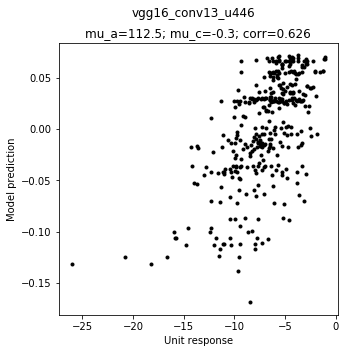

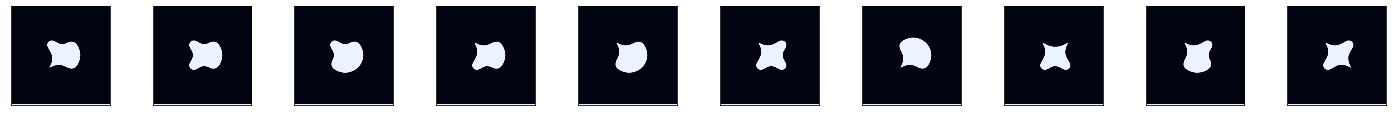

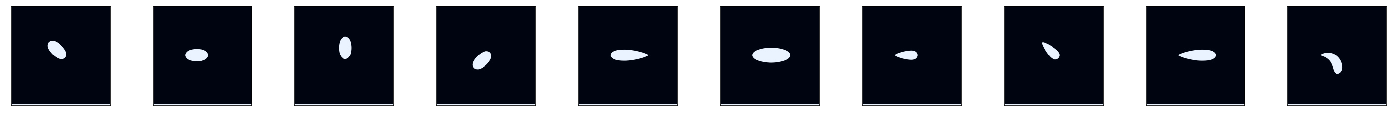

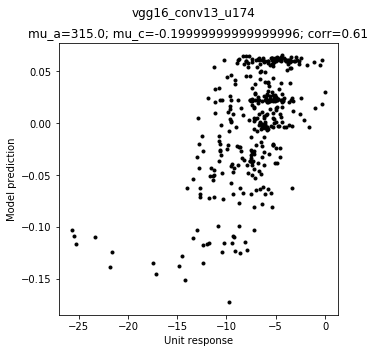

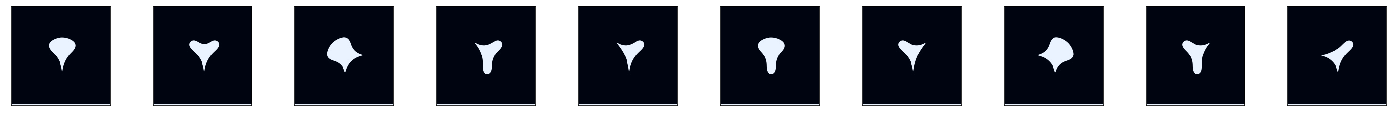

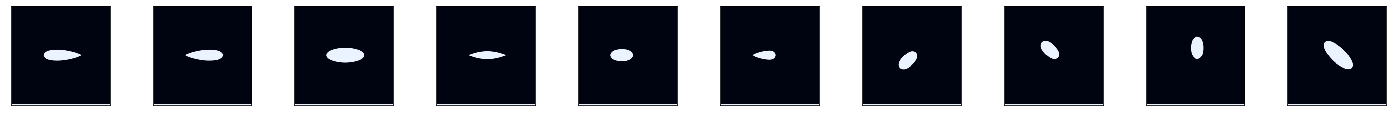

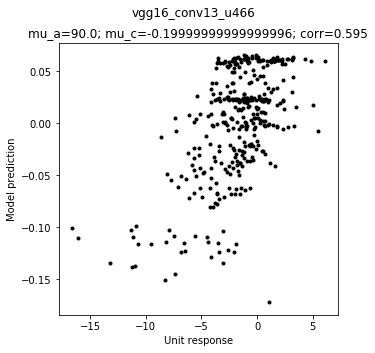

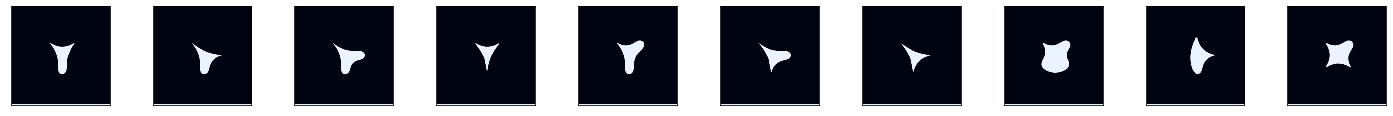

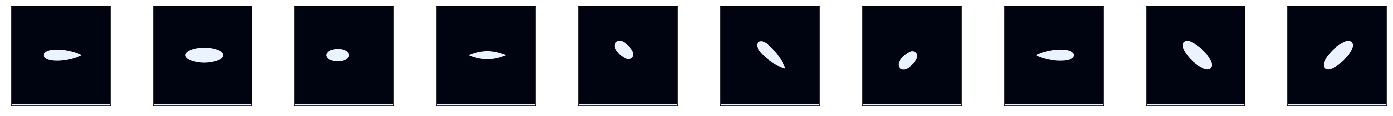

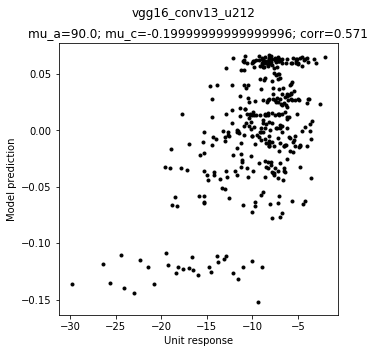

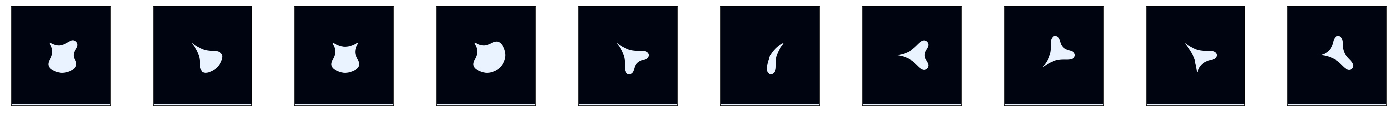

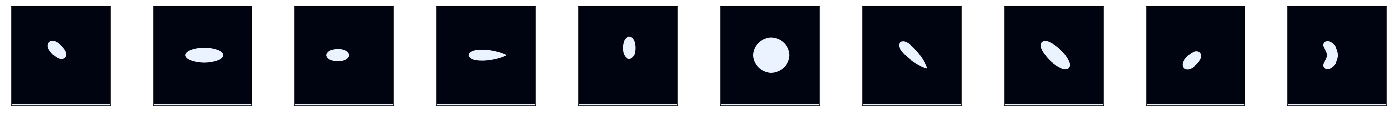

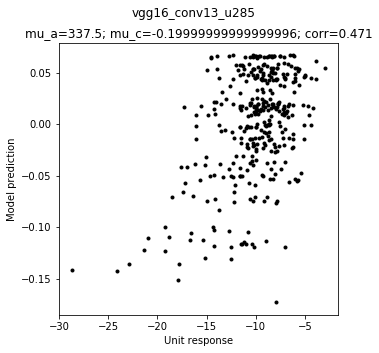

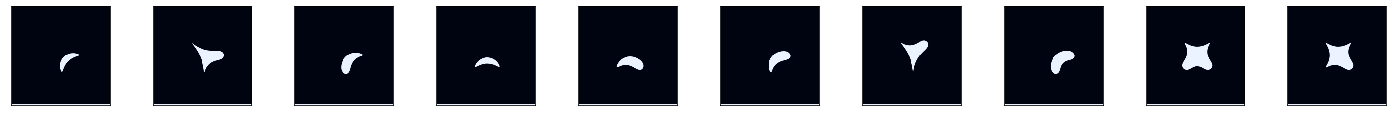

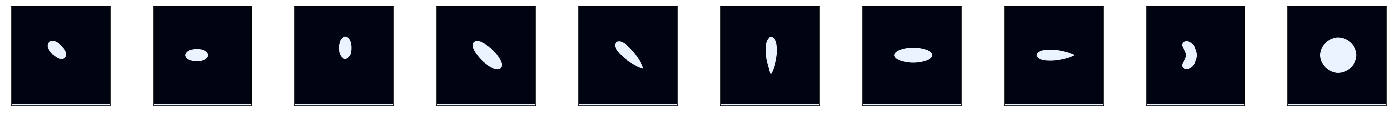

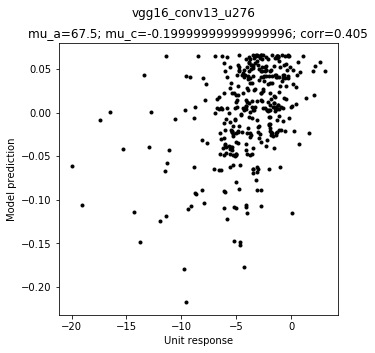

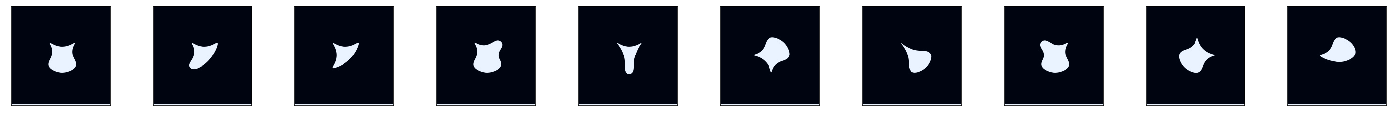

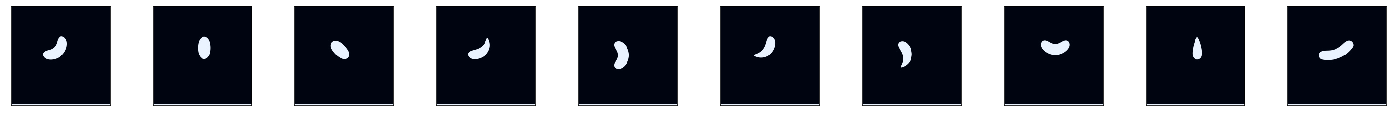

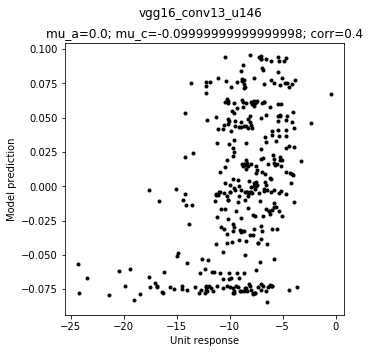

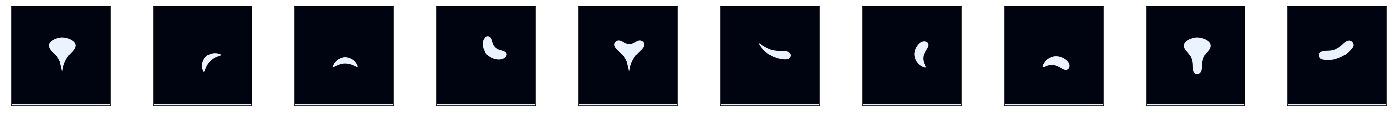

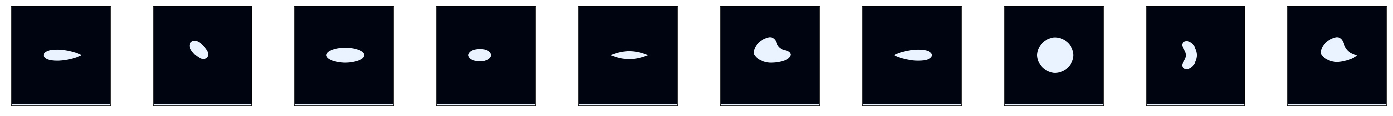

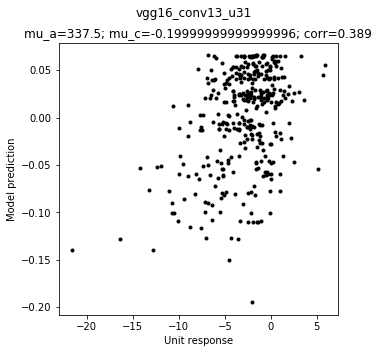

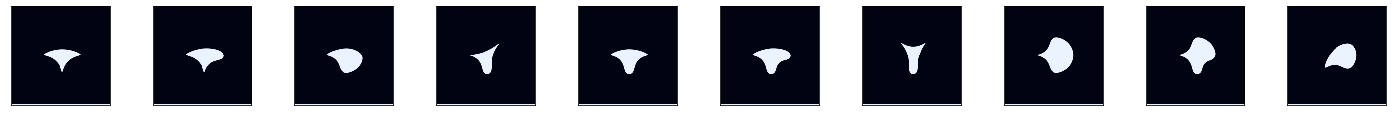

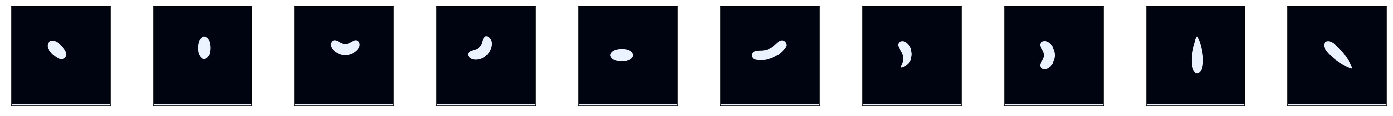

In [12]:
for (i_unit, i_model, corr) in selective_units:
    i_unit = int(i_unit)
    plot_apc_fits_for_unit(net_name, layer_name, i_unit, apc_fits, apc_models, 
                       outputs_tt, save_fig=False)
    display_top_and_bottom(unit=i_unit, n=10, outputs_tt=outputs_tt)

In [8]:
# validate correlation
(i_unit, i_model, corr) = selective_units[7]
unit_resp = get_unit_responses(outputs_tt, int(i_unit))
pred_resp = apc_models.resp[:, int(i_model)]
np.corrcoef(unit_resp, pred_resp)

array([[1.        , 0.38857253],
       [0.38857253, 1.        ]])